In [2]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': (15, 12)})

sns.set_style("white")

pd.options.display.max_colwidth = 200

In [4]:
# The data set
tweets_nhs = pd.read_csv('tweets.csv')

print(tweets_nhs.head())

              tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                  

In [5]:
# The data set with the describe() and info() functions
print(tweets_nhs.describe())

print(tweets_nhs.info())

           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   twe

In [6]:
'''The count of retweets and favorites can give an insights into which tweets are more popular or engaging.
By analyzing these counts, can identify the tweets that have gained more traction or resonated with the audience.

The distribution of retweet and favorite counts can reveal patterns in user engagement. 
We can analyze the distribution to understand the typical engagement levels and identify outliers or unusually
high engagement counts.

By examining the retweet and favorite counts, can evaluate the performance of our tweets or the tweets in the dataset. 
This information can help us assess the impact and effectiveness of different tweets and inform our
social media or content strategy.'''

By analyzing these counts, you can identify the tweets that have gained more traction or resonated with the audience.
retweet_counts = tweets_nhs['tweet_retweet_count'].value_counts()
print(retweet_counts)

favorite_counts = tweets_nhs['tweet_favorite_count'].value_counts()
print(favorite_counts)


0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


In [31]:
# A new dataframe with text values
tweets_nhs['tweet_full_text'] = tweets_nhs['tweet_full_text'].astype(str)
tweets_nhs_text = tweets_nhs['tweet_full_text'].apply(lambda x: x if x.strip() !=None else None)

In [49]:
# Look for hashtags
tags = []
for y in [x.split(' ') for x in tweets_nhs_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)
            
tags = pd.Series(tags).value_counts()

In [50]:
# The first 30 records
print(tags.head(30))

#healthcare                    502
#Healthcare                    171
#health                         63
#HealthCare                     43
#medicine                       41
#job                            38
#AI                             38
#strategy                       30
#medical                        30
#pharma                         25
#biotech                        24
#competitiveintelligence        24
#pharmaceutical                 24
#marketing                      24
#MedEd                          22
#MedTwitter                     22
#digitalhealth                  20
#vaccine                        18
#Health                         17
#competitivemarketing           16
#WomenInMedicine                16
#coronavirus                    16
#MachineLearning                16
#hiring                         15
#DoctorofVeterinaryMedicine     14
#news                           14
#PatientCare                    13
#FOAMed                         13
#healthcare.        

In [51]:
# The relevant Series that was created into a DataFrame
data = pd.DataFrame(tags).reset_index()

data.columns = ['word', 'count']
data['count'] = data['count'].astype(int)
data

,word,count
0,#healthcare,502
1,#Healthcare,171
2,#health,63
3,#HealthCare,43
4,#medicine,41
...,...,...
1856,\n#community,1
1857,one.\n#health\n#healthcare\n#Dance\n#London\n#FitnessMotivation\n#socialprescriber,1
1858,#FutureofWork.,1
1859,#ACO,1


In [54]:
# Display records where the count is larger than 10
display(data.loc[(data['count']>10)])

,word,count
0,#healthcare,502
1,#Healthcare,171
2,#health,63
3,#HealthCare,43
4,#medicine,41
5,#job,38
6,#AI,38
7,#strategy,30
8,#medical,30
9,#pharma,25


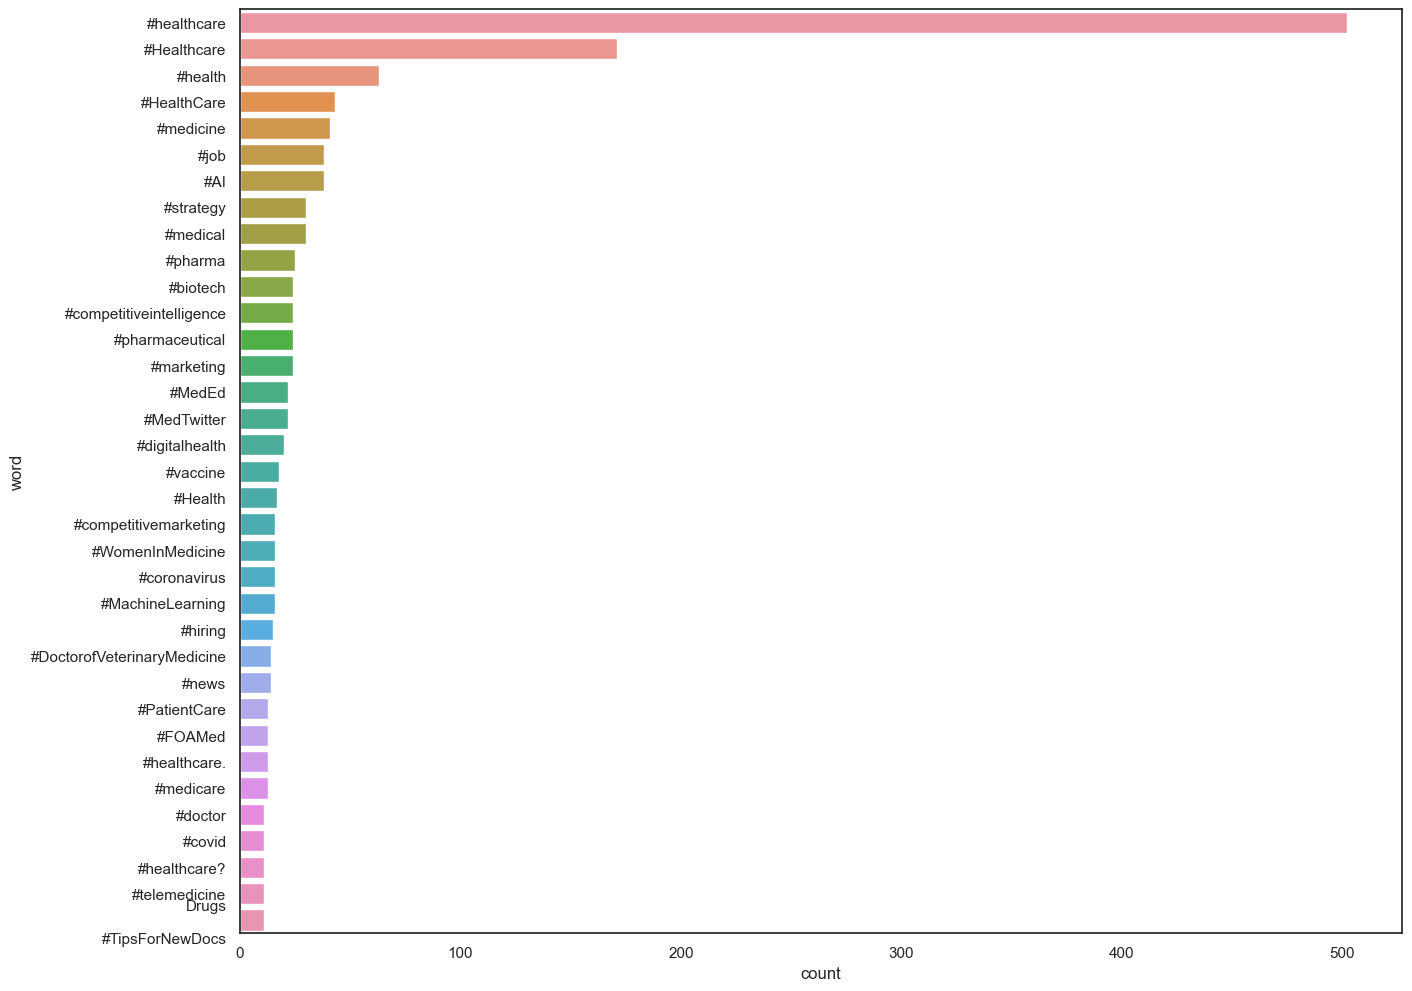

In [55]:
# A Seaborn barplot indicating records with a count >10 records
ax = sns.barplot(x='count', y='word', data=data.loc[(data['count']>10)])